<h1><center> Lasso Regression <center></h1>

<b><Lasso를 소개합니다></b><br><p>
<b>The Lasso is</b> a linear model that estimates sparse coefficients. <br>
<b>It is useful</b> in some contexts due to its tendency to prefer solutions 
with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. 
For this reason Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients <br>(see <a href="https://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py">Compressive sensing: tomography reconstruction with L1 prior (Lasso)</a>).<br>

https://scikit-learn.org/stable/modules/linear_model.html#lasso
<p>
<p>
    


<b><접근법></b><br>
Lasso Regression의 동작은    
input : 관측된 데이터 샘플 [X,y]을 받습니다 <br>
↓<br>
Function : Lasso Regression의 Error Function을 최소화합니다 <br>
↓<br>
output : 수식값이 최소가 되도록 하는 이 때의 가중치 $W$를 구합니다
<p>

<b><수식></b><p>
$$min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

<center>($X$는 입력변수, $y$는 target변수, W는 가중치, 패널티항의 계수 $\alpha$) </center>


In [1]:
from sklearn import linear_model

In [2]:
import numpy as np

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:
from sklearn.datasets import load_boston

In [7]:
import pandas as pd

In [8]:
import copy

In [9]:
np.random.seed(42)

In [10]:
X, y = load_boston(return_X_y=True)

In [11]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [12]:
display(X)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [14]:
scaler = preprocessing.StandardScaler().fit(X_train)
print(scaler.mean_)                                      
print(scaler.scale_)                                      
X_train_copy = copy.deepcopy(X_train)
X_train=pd.DataFrame(scaler.transform(X_train))

[3.46988686e+00 1.14039548e+01 1.11330508e+01 7.34463277e-02
 5.57259322e-01 6.32567232e+00 6.87997175e+01 3.76587401e+00
 9.43785311e+00 4.07042373e+02 1.82779661e+01 3.59701808e+02
 1.24211299e+01]
[8.30407703e+00 2.25765011e+01 6.92884344e+00 2.60867715e-01
 1.16626831e-01 7.18194456e-01 2.76262572e+01 2.12302684e+00
 8.62775916e+00 1.66286870e+02 2.25360235e+00 8.68019175e+01
 7.10234960e+00]


In [15]:
X_test_copy = copy.deepcopy(X_test) 
X_test= pd.DataFrame(scaler.transform(X_test))

In [16]:
print(X_train)

            0         1         2         3         4         5         6  \
0   -0.414259 -0.505125 -1.292142 -0.281546 -0.851085  0.145264 -0.365584   
1   -0.402008 -0.505125 -0.162083 -0.281546 -0.087967 -0.208401  0.133941   
2   -0.397211 -0.505125 -0.609489 -0.281546 -0.936828 -0.896237 -1.266900   
3   -0.290936 -0.505125 -0.431970 -0.281546 -0.165136 -0.543965 -1.429789   
4    1.457816 -0.505125  1.005500 -0.281546  0.194987 -0.556496  0.079645   
..        ...       ...       ...       ...       ...       ...       ...   
349 -0.397237 -0.505125 -0.371354 -0.281546 -0.319475 -0.681810  0.836171   
350 -0.381828  0.380752 -0.602272 -0.281546 -0.799639 -0.653963 -0.966462   
351 -0.416046  3.038382 -1.316677 -0.281546 -1.048295  0.430702 -1.415310   
352  0.926113 -0.505125  1.005500 -0.281546  1.566884  0.422348  0.933904   
353 -0.390305 -0.505125 -0.371354 -0.281546 -0.319475  0.110454  0.600888   

            7         8         9        10        11        12  
0    1.08

In [17]:
predictors = X_train.columns
print(list(predictors))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


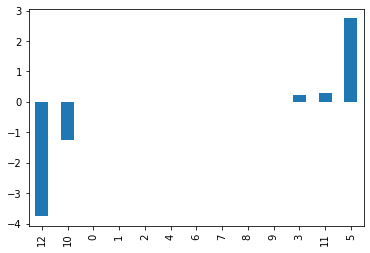

In [18]:
reg = linear_model.Lasso(alpha=0.98)
reg.fit(X_train, y_train)
coef = pd.Series(reg.coef_, predictors).sort_values()
coef.plot(kind = 'bar')

In [19]:
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))


0.677633628941182
0.6447701899387819


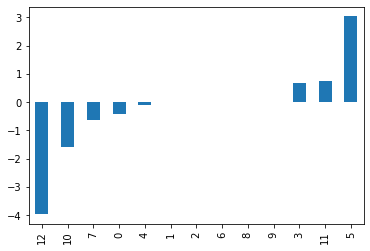

In [20]:
reg_2 = linear_model.Lasso(alpha=0.35)
reg_2.fit(X_train, y_train)
coef_2 = pd.Series(reg_2.coef_, predictors).sort_values()
coef_2.plot(kind = 'bar');

In [21]:
print(reg_2.score(X_train, y_train))
print(reg_2.score(X_test, y_test))

0.7165187917818385
0.6653090224072022


In [22]:
print(reg.coef_)


[-1.60337581e-03  0.00000000e+00 -0.00000000e+00  2.41223932e-01
 -0.00000000e+00  2.74103670e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.25865705e+00  2.81407450e-01
 -3.75686822e+00]


In [23]:
print(reg.intercept_)

[23.01581921]


https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/#four

https://greatjoy.tistory.com/61